In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [44]:
df=pd.read_csv("dataset w7.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [46]:
df['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

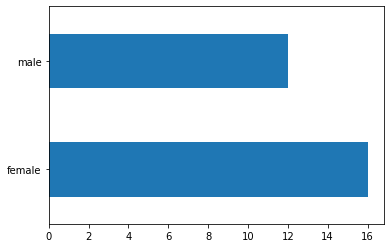

In [47]:
df['Gender'].value_counts().plot(kind='barh');

In [48]:
#Female Students are more.

<AxesSubplot:xlabel='Gender', ylabel='count'>

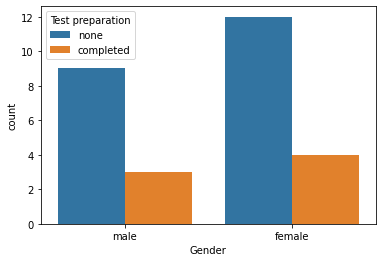

In [49]:
sns.countplot(x='Gender',data=df,hue='Test preparation') 

In [50]:
#more female studens are completed the test preperation

In [51]:
df['Test preparation'].value_counts()/len(df)*100

none         75.0
completed    25.0
Name: Test preparation, dtype: float64

In [52]:
#25% of students completed Test Preparation  75% Students not completed the Test Preperation

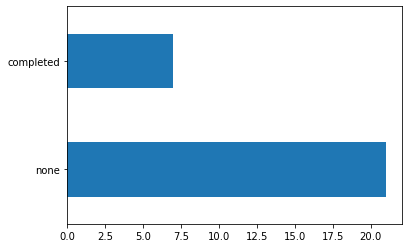

In [53]:
df['Test preparation'].value_counts().plot(kind='barh'); 

In [54]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [55]:
#There is no null values in the data

In [56]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [57]:
df["Total Marks"].describe()

count    28.000000
mean     32.321429
std      12.454520
min      12.000000
25%      22.500000
50%      33.000000
75%      43.250000
max      50.000000
Name: Total Marks, dtype: float64

In [58]:
df["Total Marks"].var()

155.11507936507937

In [59]:
df["Total Marks"].std()

12.454520438984368

In [60]:
abs_median_devs=abs(df["Total Marks"].median()-df["Total Marks"])
abs_median_devs.median()

10.5

In [61]:
df.groupby(["Gender","Test preparation"])['Total Marks'].describe()

count       mean        std   min    25%   50%   75%  \
Gender Test preparation                                                         
female completed           4.0  45.250000   4.573474  40.0  42.25  45.5  48.5   
       none               12.0  29.916667  12.486053  12.0  20.25  27.5  41.0   
male   completed           3.0  43.666667   0.577350  43.0  43.50  44.0  44.0   
       none                9.0  26.000000  10.758717  14.0  18.00  24.0  30.0   

                          max  
Gender Test preparation        
female completed         50.0  
       none              48.0  
male   completed         44.0  
       none              47.0

In [62]:
#From the above data,we can infer the below points.
#1. 25% of students completed Test Preparation  75% Students not completed the Test Preperation
#2. Female students are more in the dataset.
#3. There is no null values in the data
#4. Femal and male both genders are scoring minimum 40 or above if they are completed the test prperation.
    #Otherwise scoring less marks.It means the test preparation has an impact on the marks.



# 2. Check whether female and male students scored the same marks.

In [63]:
#Hypothesis setting
#H0 as Null Hypothesis and Ha as Alternate Hypothysis.
#H0:Femal and Male didnot score the smae marks
#Ha:female and male students score the same marks

In [64]:
alpha=0.05
female=df[df['Gender']=='female']['Total Marks']
male=df[df['Gender']=='male']['Total Marks']

In [65]:
_,p=ttest_ind(female,male)
print('p value:',p)

p value: 0.4937822317960763


In [66]:
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

fail to reject the Null Hypothesis,H0


In [67]:
#We can conclude that male and female students did not score the same mark as per the t-test

# 3. Whether test preparation helps the students?

In [68]:
#Hypothesis setting
#H0 as Null Hypothesis and Ha as Alternate Hypothysis.
#H0:Test preparation did not help students.
#Ha:Test preparation helps the students.

In [69]:
No_Test=df[df['Test preparation']=='none']['Total Marks']
Test_Done=df[df['Test preparation']=='completed']['Total Marks']
alpha=0.05

In [70]:
_,p=ttest_ind(No_Test,Test_Done)
print("P value is",p)

P value is 0.0012671292457320106


In [71]:
if p> alpha:
    print ('Fail to reject the Null Hypothesis,H0')
else:
    print('Rejecting the Null Hypothesis,H0')

Rejecting the Null Hypothesis,H0


In [72]:
#We can conclude that test preparation helped the students